## MUSIC ARTIST RECOMMENDATION ENGINE

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading dataset
df=pd.read_csv('music.csv')
print(df.shape)
df.head(2)

(1994, 15)


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39


##### DATA PREPARATION

In [4]:
#checking for null values
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

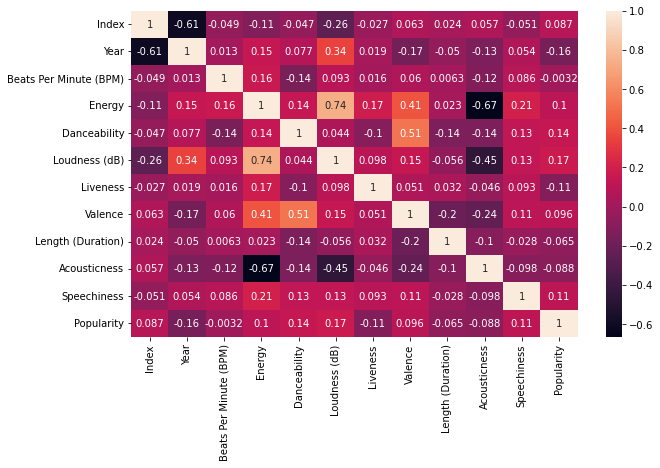

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
df.drop(['Liveness','Index'],axis=1,inplace=True)

In [8]:
df.head(2)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,81,207,17,7,39


In [9]:
#geting all column names
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [10]:
columns=['Beats Per Minute (BPM)', 'Energy',
       'Danceability', 'Loudness (dB)', 'Valence', 'Length (Duration)',
       'Acousticness', 'Speechiness', 'Popularity']

In [11]:
#SCALING THE DATASET
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()

In [12]:
df_scaled=df.copy()
df_scaled[columns]=min_max_scaler.fit_transform(df[columns])

### BASED ON TOP GENRE

In [13]:
df_scaled.groupby(by=['Top Genre'])['Title'].value_counts()

Top Genre         Title                                                                  
acid jazz         Virtual Insanity - Remastered                                              1
acoustic pop      9 Crimes                                                                   1
                  I Won't Give Up                                                            1
                  I'm Yours                                                                  1
                  The Blower's Daughter                                                      1
                                                                                            ..
stomp and holler  My Silver Lining                                                           1
streektaal        Het het nog nooit zo donker west                                           1
trance            Silence (feat. Sarah McLachlan) - DJ Tiësto's In Search of Sunrise Edit    1
uk pop            Nine Million Bicycles                

In [14]:
#top genre wise number of songs
df_scaled['Top Genre'].value_counts()

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

In [15]:
df_scaled['Top Genre'].nunique()

149

### K MEANS CLUSTERING

In [16]:
from sklearn.cluster import KMeans

n_clusters value: 10 



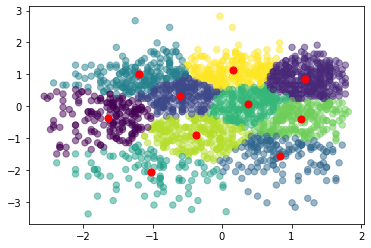

n_clusters value: 20 



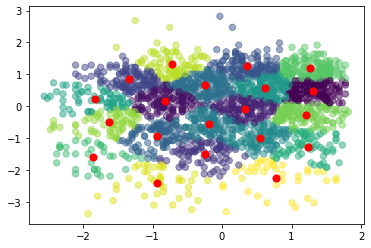

n_clusters value: 30 



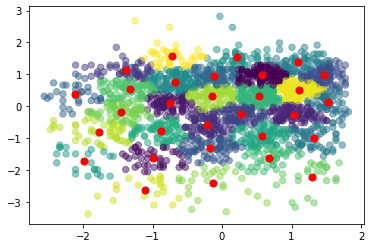

n_clusters value: 40 



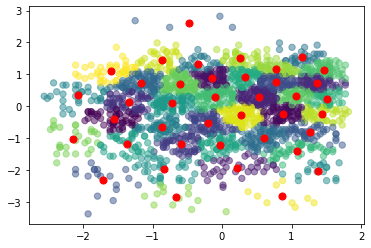

n_clusters value: 50 



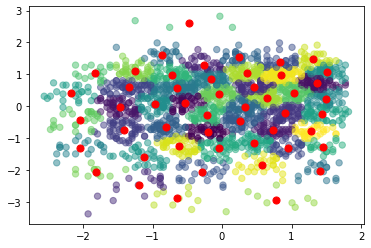

n_clusters value: 60 



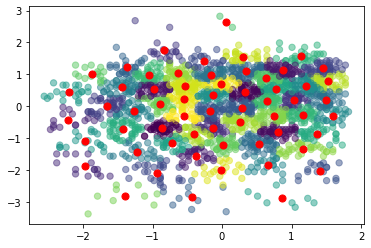

n_clusters value: 70 



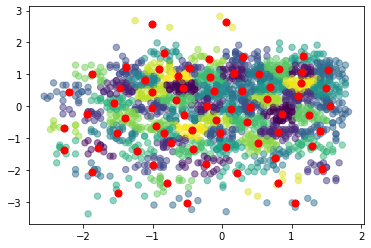

n_clusters value: 80 



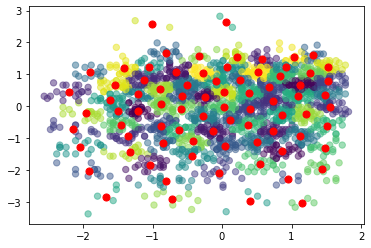

n_clusters value: 90 



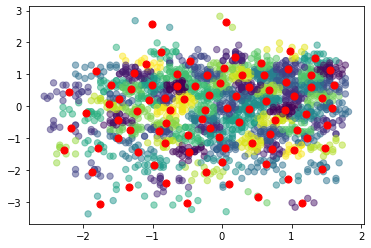

In [17]:
for k in range(10,100,10):
        print('n_clusters value:',k,'\n')
        df2  = df_scaled[['Energy','Popularity']]
        df1=df2.copy()
        kmeans = KMeans(n_clusters=k,n_init=3).fit(df2)
        centroids = kmeans.cluster_centers_
        #print(centroids)

        plt.scatter(df2['Energy'], df2['Popularity'], c= kmeans.labels_.astype(float), s=40, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()

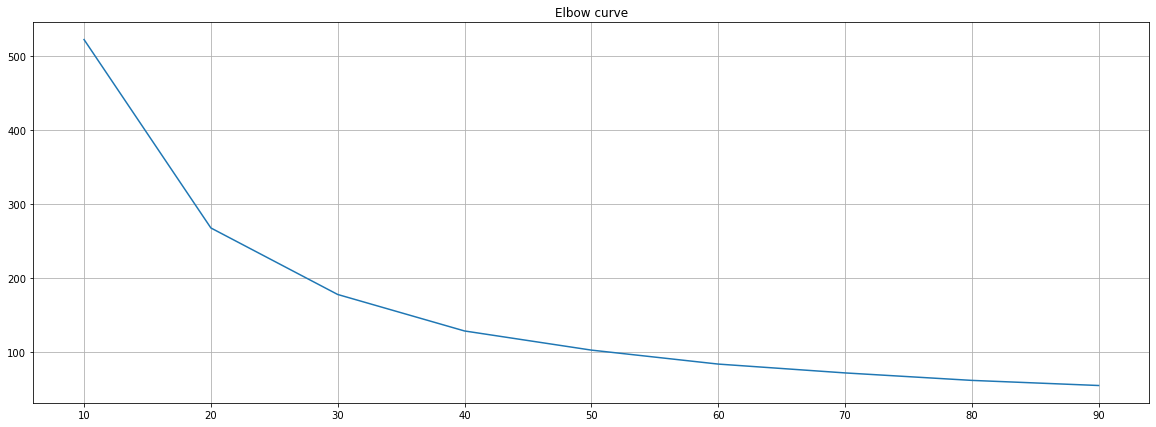

In [18]:
distorsions = []
for k in range(10, 100,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(20, 7))
plt.plot(range(10, 100,10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

In [19]:
clusterer = KMeans(n_clusters=20, random_state=10)
cluster_labels = clusterer.fit_predict(df_scaled[columns])
df2['Cluster'] = cluster_labels
df2['Top Genre']=df['Top Genre']
df3=df2.copy()

In [20]:
df2[df2.Cluster==1]

,Energy,Popularity,Cluster,Top Genre
30,-0.707919,1.705702,1,permanent wave
33,-1.791501,1.008741,1,adult standards
50,-1.114262,0.660261,1,alternative rock
105,-1.023964,1.078437,1,hip pop
123,-1.069113,0.729957,1,album rock
...,...,...,...,...
1930,-0.617621,1.148133,1,classic rock
1943,-0.753069,0.520868,1,adult standards
1987,-1.610904,0.590565,1,adult standards
1989,-1.746352,0.242084,1,adult standards


In [21]:
for Cluster in df2.Cluster.unique():
    print(Cluster)
    print(df2[df2.Cluster == Cluster]['Top Genre'].unique())

9
['adult standards' 'german pop' 'dance pop' 'dutch indie' 'neo mellow'
 'permanent wave' 'album rock' 'carnaval limburg' 'blues rock'
 'alternative metal' 'dutch pop' 'art rock' 'dutch hip hop' 'glam rock'
 'icelandic indie' 'british invasion' 'classic rock' 'british folk' 'pop'
 'bubblegum pop' 'classic uk pop' 'classic country pop' 'folk' 'europop'
 'mellow gold' 'canadian folk' 'alternative country' 'classic soul'
 'dutch cabaret' 'classical rock' 'latin jazz' 'latin' 'modern rock'
 'bebop']
17
['album rock' 'dutch pop' 'dutch cabaret' 'dutch indie' 'belgian rock'
 'dutch rock' 'adult standards' 'scottish singer-songwriter'
 'dutch americana' 'dance pop' 'german pop' 'candy pop' 'irish rock'
 'classic uk pop' 'alternative rock' 'big beat' 'classic rock'
 'dutch hip hop' 'australian rock' 'metropopolis' 'g funk' 'rock-and-roll'
 'art pop' 'art rock' 'disco' 'blues rock' 'austropop' 'hard rock'
 'europop' 'reggae' 'dance rock' 'basshall' 'glam rock' 'folk'
 'alternative metal' 'carn

### DBSCAN

In [22]:
from sklearn.cluster import DBSCAN

EPSILON= 0.3 MIN_SAMPLES= 20
No.of CLUSTERS: 2
OUTLIERS: 160


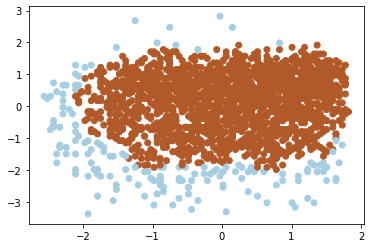

EPSILON= 0.3 MIN_SAMPLES= 40
No.of CLUSTERS: 2
OUTLIERS: 371


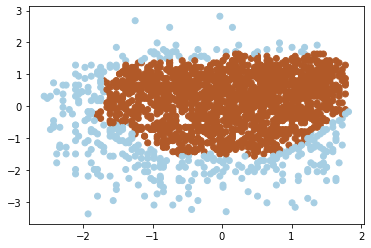

EPSILON= 0.3 MIN_SAMPLES= 60
No.of CLUSTERS: 2
OUTLIERS: 909


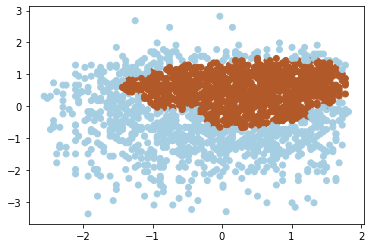

EPSILON= 0.3 MIN_SAMPLES= 80
No.of CLUSTERS: 3
OUTLIERS: 1799


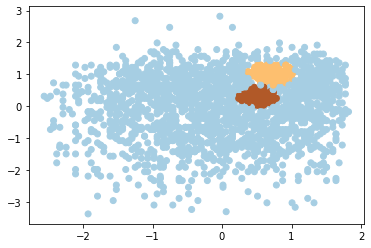

EPSILON= 0.4 MIN_SAMPLES= 20
No.of CLUSTERS: 4
OUTLIERS: 62


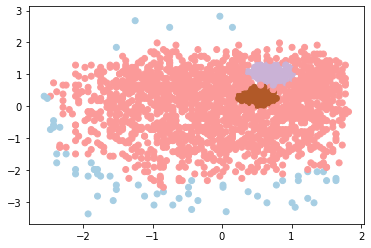

EPSILON= 0.4 MIN_SAMPLES= 40
No.of CLUSTERS: 4
OUTLIERS: 159


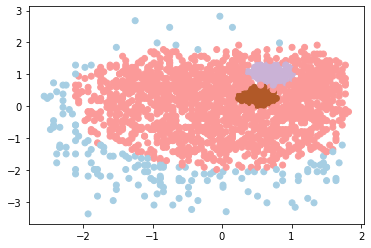

EPSILON= 0.4 MIN_SAMPLES= 60
No.of CLUSTERS: 4
OUTLIERS: 248


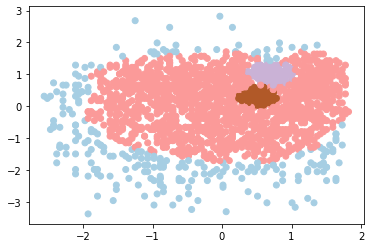

EPSILON= 0.4 MIN_SAMPLES= 80
No.of CLUSTERS: 4
OUTLIERS: 481


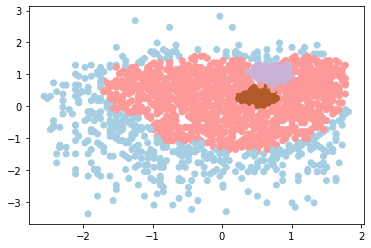

EPSILON= 0.6 MIN_SAMPLES= 20
No.of CLUSTERS: 5
OUTLIERS: 15


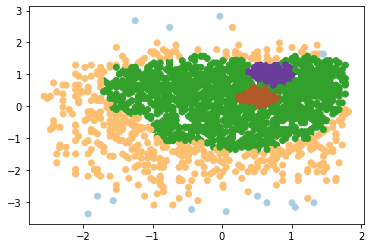

EPSILON= 0.6 MIN_SAMPLES= 40
No.of CLUSTERS: 5
OUTLIERS: 106


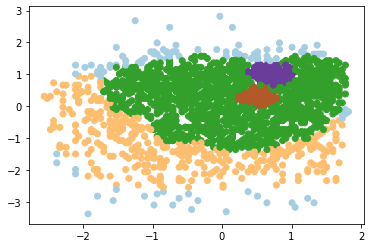

EPSILON= 0.6 MIN_SAMPLES= 60
No.of CLUSTERS: 6
OUTLIERS: 180


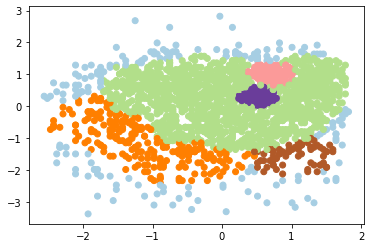

EPSILON= 0.6 MIN_SAMPLES= 80
No.of CLUSTERS: 5
OUTLIERS: 366


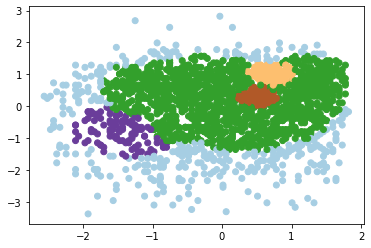

EPSILON= 0.9 MIN_SAMPLES= 20
No.of CLUSTERS: 6
OUTLIERS: 1


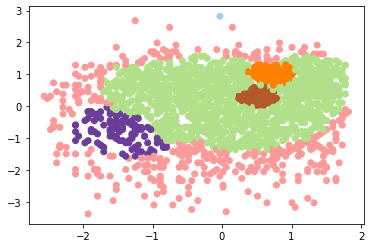

EPSILON= 0.9 MIN_SAMPLES= 40
No.of CLUSTERS: 7
OUTLIERS: 42


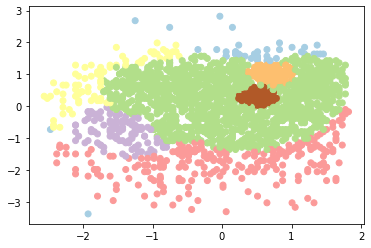

EPSILON= 0.9 MIN_SAMPLES= 60
No.of CLUSTERS: 6
OUTLIERS: 133


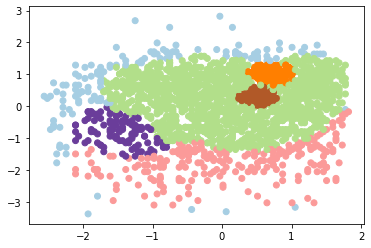

EPSILON= 0.9 MIN_SAMPLES= 80
No.of CLUSTERS: 6
OUTLIERS: 148


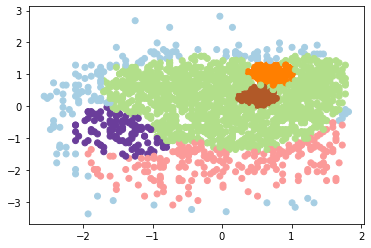

In [23]:
eps=[0.3,0.4,0.6,0.9]
min_samples=[20,40,60,80]
for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j)
        df1['clusterid'] = dbscan.fit_predict(df1)
        print('EPSILON=',i,'MIN_SAMPLES=',j)
        y_pred=df1['clusterid']
        O=np.sum(df1['clusterid']==-1)
        clust=df1['clusterid'].nunique()
        print('No.of CLUSTERS:',clust)
        print('OUTLIERS:',O)
        plt.scatter(df1['Energy'], df1['Popularity'], c= y_pred,cmap='Paired')
        plt.show()

EPSILON= 0.9 MIN_SAMPLES= 20

No.of CLUSTERS: 6

OUTLIERS: 1

### HIERARCHICAL CLUSTERING

In [24]:
from sklearn.cluster import  AgglomerativeClustering

n_clusters: 10 Linkage: complete


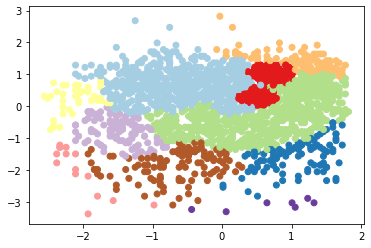

n_clusters: 20 Linkage: complete


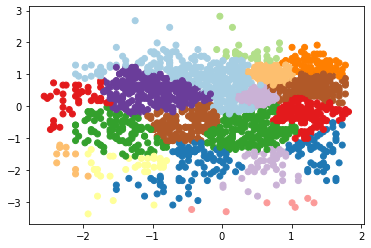

n_clusters: 30 Linkage: complete


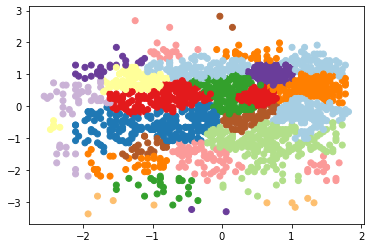

n_clusters: 40 Linkage: complete


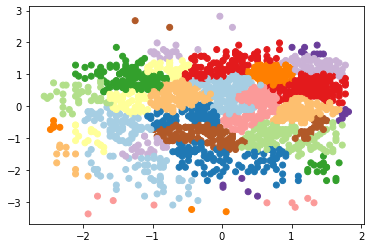

n_clusters: 50 Linkage: complete


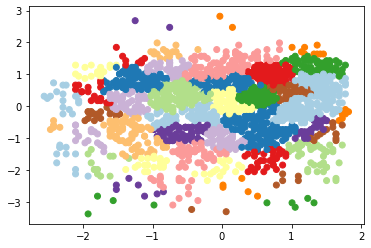

n_clusters: 60 Linkage: complete


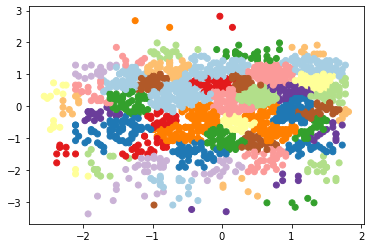

n_clusters: 10 Linkage: average


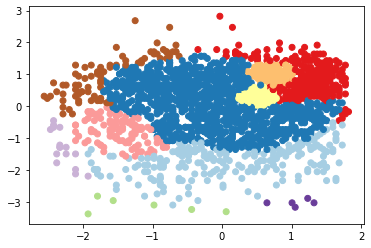

n_clusters: 20 Linkage: average


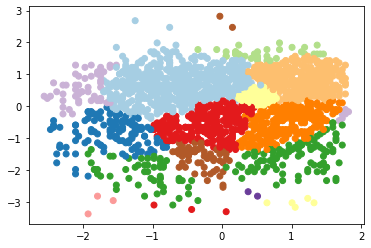

n_clusters: 30 Linkage: average


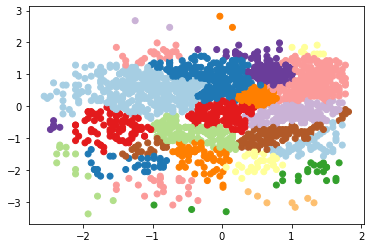

n_clusters: 40 Linkage: average


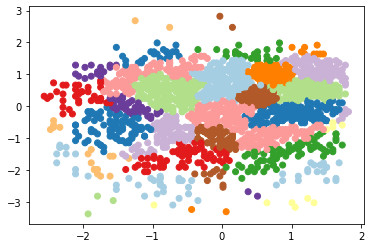

n_clusters: 50 Linkage: average


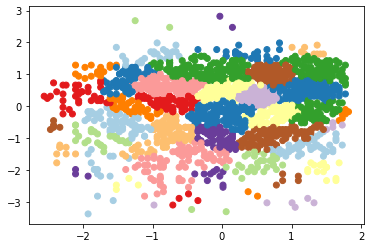

n_clusters: 60 Linkage: average


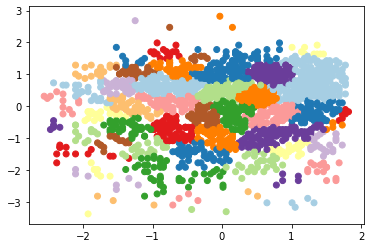

n_clusters: 10 Linkage: ward


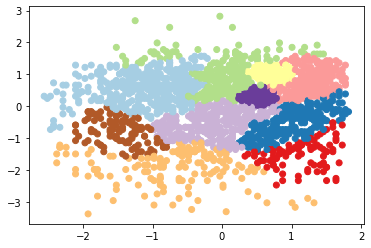

n_clusters: 20 Linkage: ward


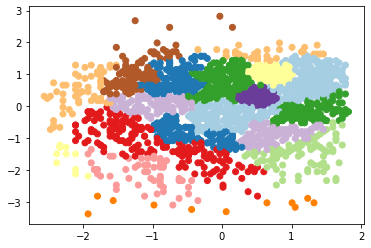

n_clusters: 30 Linkage: ward


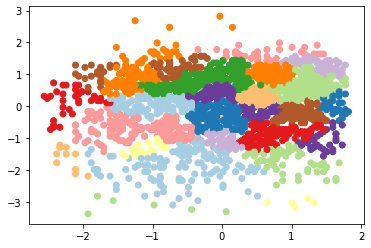

n_clusters: 40 Linkage: ward


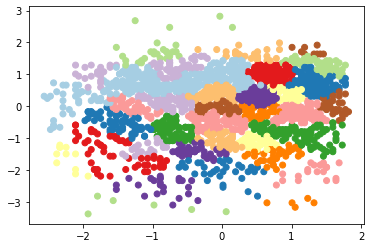

n_clusters: 50 Linkage: ward


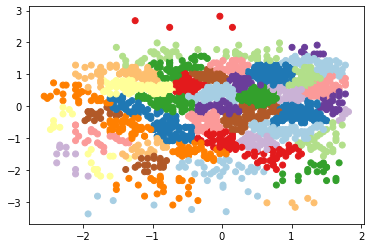

n_clusters: 60 Linkage: ward


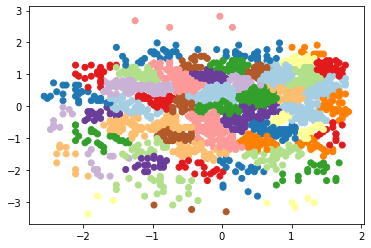

In [25]:
Cluster=[10,20,30,40,50,60]
Linkage=['complete','average','ward']
for i in Linkage:
    for j in Cluster:
        model = AgglomerativeClustering(n_clusters=j, linkage =i)
        model = model.fit_predict(df1)
        print('n_clusters:',j,'Linkage:',i)
        plt.scatter(df1['Energy'], df1['Popularity'], c= model,cmap='Paired')
        plt.show()

n_cluster=20

linkage=complete,ward

In [26]:
import scipy.cluster.hierarchy as shc

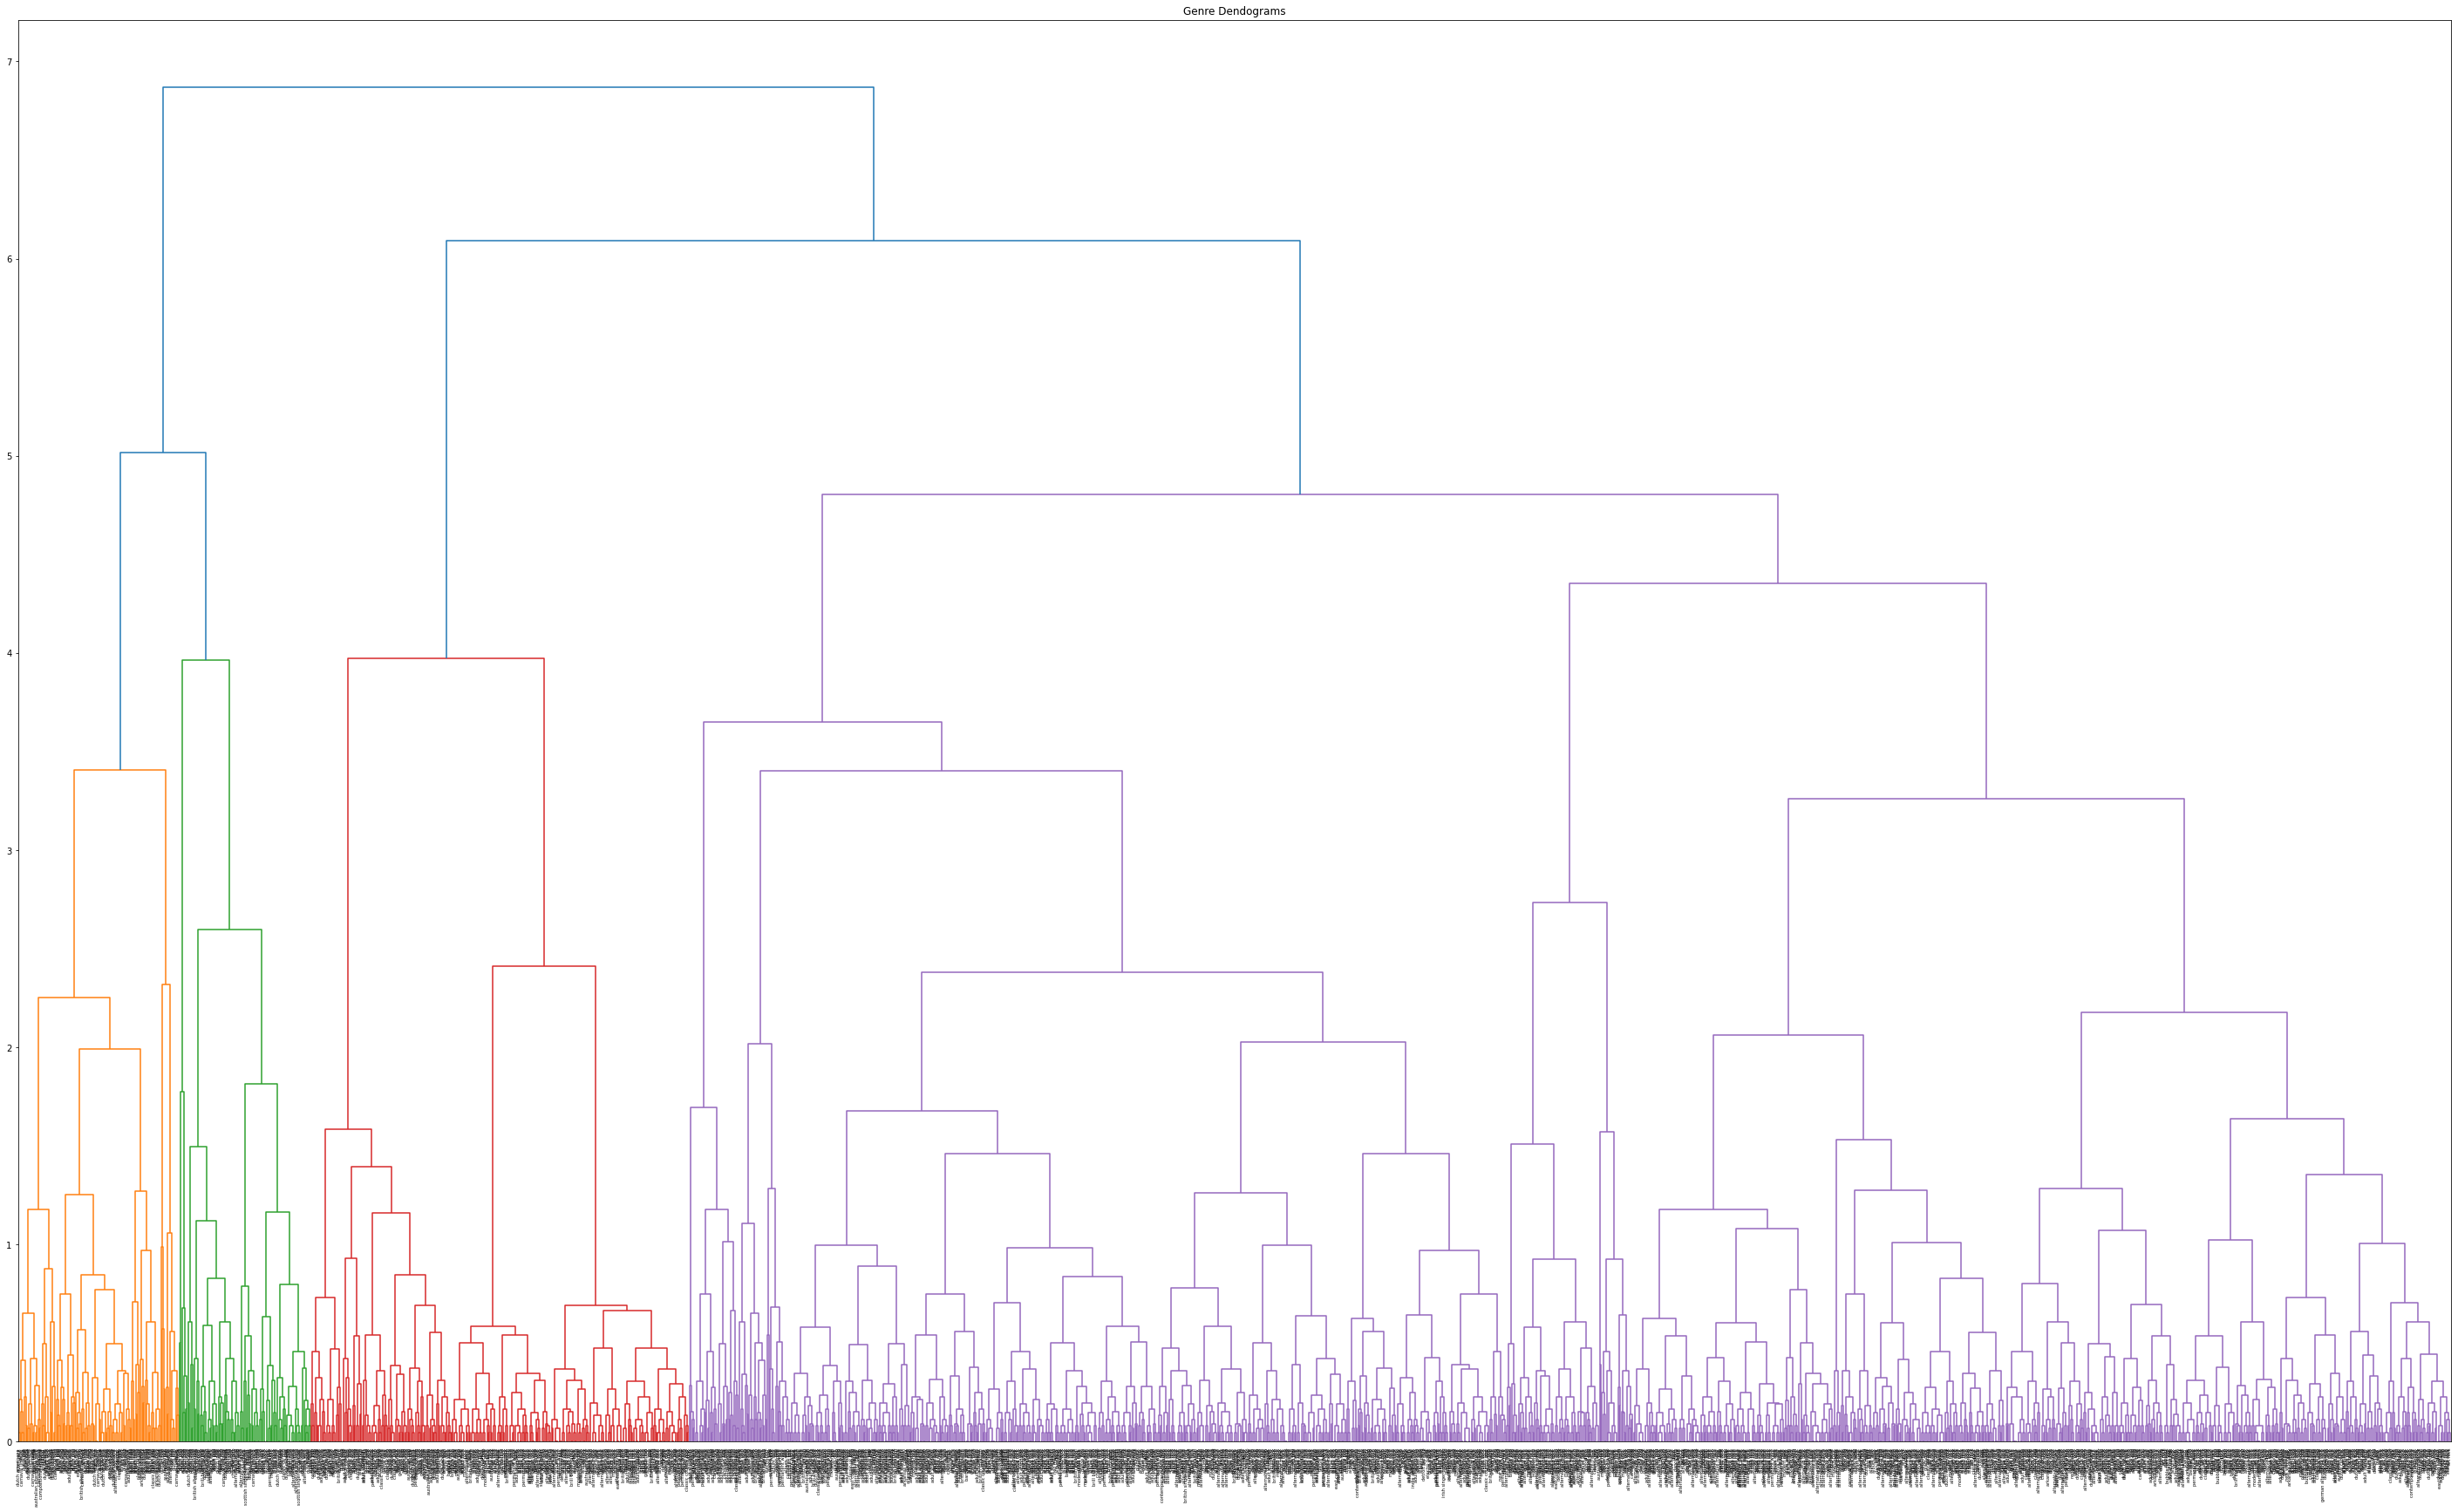

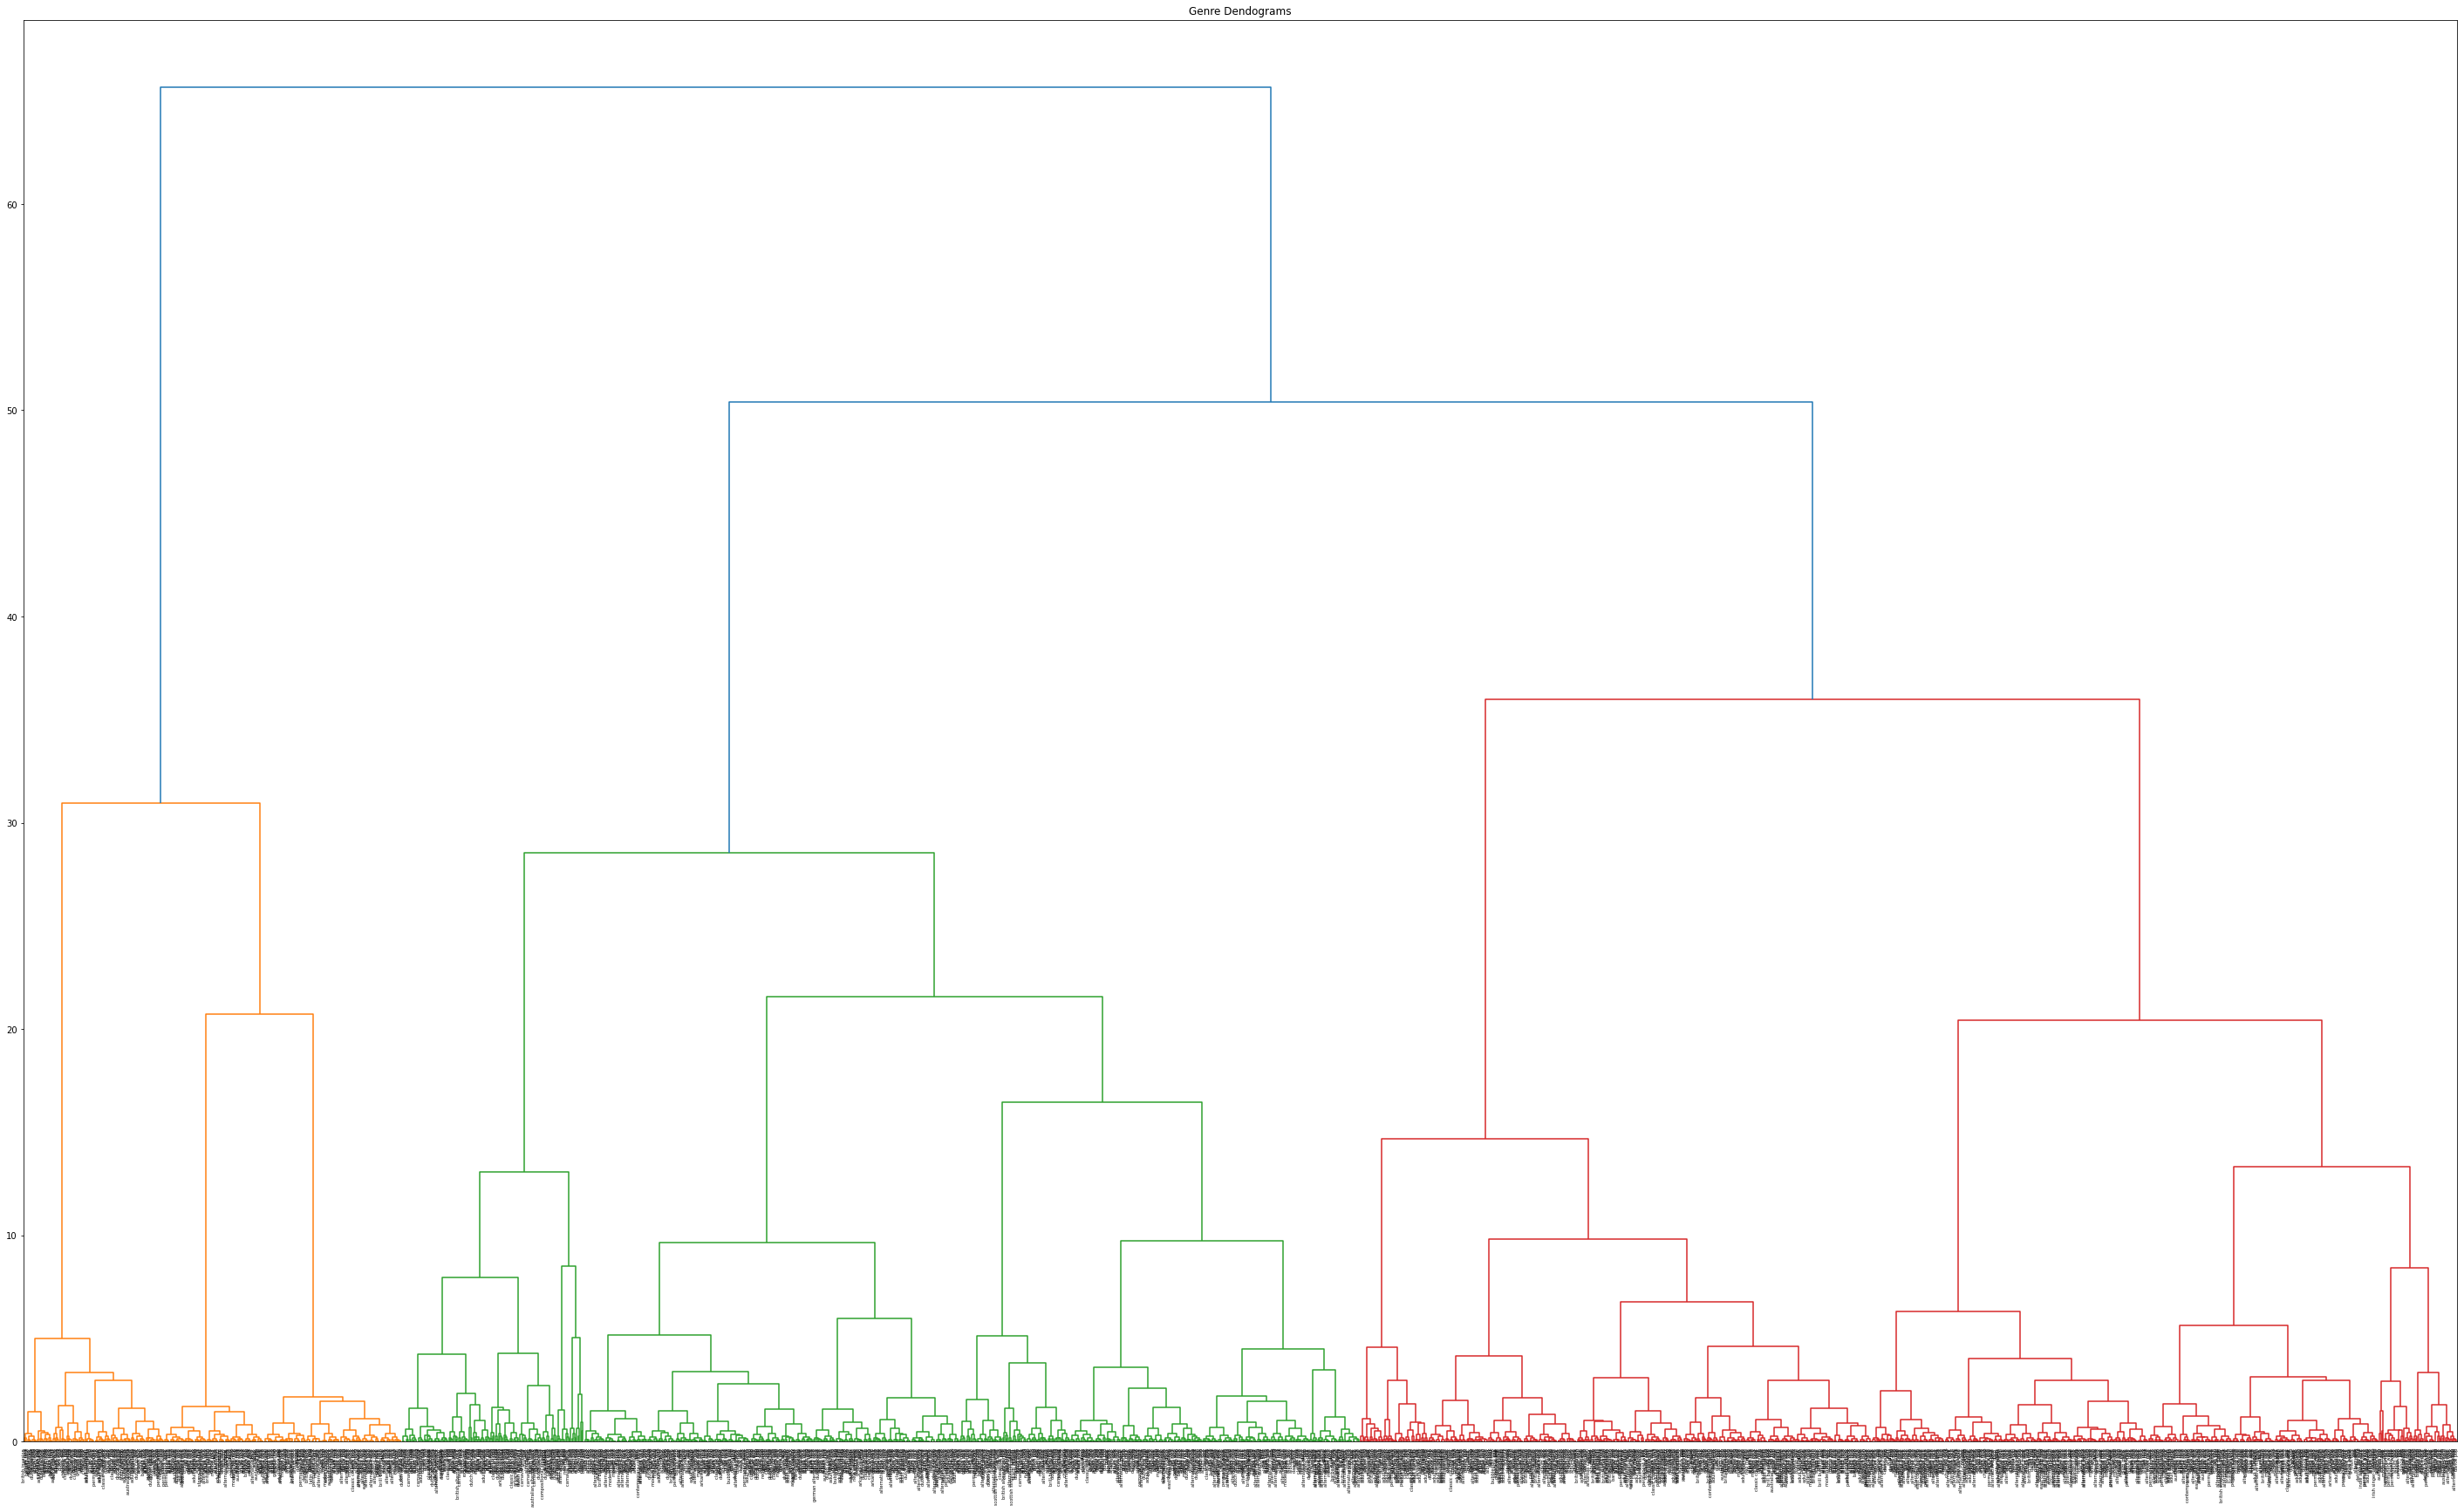

In [27]:
Linkage=['complete','ward']
for i in Linkage:

    plt.figure(figsize=(50, 30))
    plt.title("Genre Dendograms")

    df1.index= df['Top Genre']

    shc.dendrogram(shc.linkage(df1, method=i),labels=df1.index,orientation= 'top')
    ax = plt.gca()
    ax.tick_params(axis='y', which='major', labelsize=10)

##### TASK 3

##### DETERMINING SIMILAR SONGS

Choosing K MEANS from 3 models

In [28]:
df3['Title']=df['Title']
df3['Artist']=df['Artist']
df3

,Energy,Popularity,Cluster,Top Genre,Title,Artist
0,-1.340009,0.799653,9,adult standards,Sunrise,Norah Jones
1,0.872304,-1.430623,17,album rock,Black Night,Deep Purple
2,0.420812,0.660261,15,alternative hip hop,Clint Eastwood,Gorillaz
3,1.639841,1.148133,7,alternative metal,The Pretender,Foo Fighters
4,1.007752,-0.036701,18,classic rock,Waitin' On A Sunny Day,Bruce Springsteen
...,...,...,...,...,...,...
1989,-1.746352,0.242084,1,adult standards,Heartbreak Hotel,Elvis Presley
1990,0.736856,0.660261,7,adult standards,Hound Dog,Elvis Presley
1991,0.917453,1.008741,7,blues rock,Johnny B. Goode,Chuck Berry
1992,-1.520606,0.381476,9,bebop,Take Five,The Dave Brubeck Quartet


In [29]:
for i in range(0,20):

    print('\t\t CLUSTER NUMBER:',i)
    ind=np.where(df3['Cluster']==i)
    #print(ind)
    print(df3.iloc[ind]['Title'],'\n')

		 CLUSTER NUMBER: 0
13                          I'm going home
40           Don't Let Me Be Misunderstood
53                      The Unforgiven III
151                       Ghost Love Score
179       Like a Hurricane - 2003 Remaster
                       ...                
1712    Casser la voix - Live "Si Ce Soir"
1884                               The End
1893                         Light My Fire
1936                               Suzie Q
1956    You Can't Always Get What You Want
Name: Title, Length: 64, dtype: object 

		 CLUSTER NUMBER: 1
30                                          The Scientist
33                                         Don't Know Why
50                                           Just Breathe
105            Empire State of Mind (Part II) Broken Down
123                                         Eternal Flame
                              ...                        
1930       Mrs. Robinson - From "The Graduate" Soundtrack
1943                                  

In [30]:
#user giving input song
song=input('Enter the title:\t')
a=df3[df3.Title==song]
a=a[['Cluster','Artist']]
b=a.iloc[0][0]
Clust=df3[df3.Cluster==b]
Clust=Clust['Title'][0:]
print('\nThe Similar songs are:-\n')
print(Clust.drop(a.index))

Enter the title:	The Scientist

The Similar songs are:-

33                                         Don't Know Why
50                                           Just Breathe
105            Empire State of Mind (Part II) Broken Down
123                                         Eternal Flame
127                                             Daughters
                              ...                        
1930       Mrs. Robinson - From "The Graduate" Soundtrack
1943                                  I'd Rather Go Blind
1987    My Baby Just Cares for Me - 2013 Remastered Ve...
1989                                     Heartbreak Hotel
1993                                       Blueberry Hill
Name: Title, Length: 123, dtype: object


##### TASK 4

##### MATCHING ARTISTS

In [33]:
#user giving input song
song=input('Enter the title:\t')
a=df3[df3.Title==song]
a=a[['Cluster','Artist']]
b=a.iloc[0][0]
Clust=df3[df3.Cluster==b]
# Clust=Clust['Artist'][0:]
print('\nThe Similar ARTISTS are:-\n')
ind=Clust.drop(a.index)
ind['Release year']=df['Year']
ind[['Artist','Release year','Top Genre']].head()

Enter the title:	The Scientist

The Similar ARTISTS are:-



,Artist,Release year,Top Genre
33,Norah Jones,2002,adult standards
50,Pearl Jam,2009,alternative rock
105,Alicia Keys,2009,hip pop
123,The Bangles,2004,album rock
127,John Mayer,2003,neo mellow


##### TASK 5

K-Means and Hierarchy clustering have similar characteristics

In [32]:
#END